In [1]:
import makesens.tratamiento.tratamiento as mkt
import makesens.visualizacion.visualizacion as mkv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def clean(data,var):
    b = np.array(data[var])
    b = np.where(b == 'Zero',np.nan,b)
    b = np.where(b == 'Calib',np.nan,b)
    b = np.where(b == '<Samp',np.nan,b)
    data[var] = list(b)
    return data

In [3]:
amb = mkt.loaddata_amb('../Data/DATOSMINUTOS.csv','csv')
eva2 = pd.read_csv('../Data/EVAS_Pilar/Eva2/Eva2Pilar.csv')
eva2.index = pd.DatetimeIndex(eva2['Unnamed: 0']) - pd.Timedelta(hours = 5, minutes = 5)
eva2.index = eva2.index.strftime('%Y-%m-%d %H:%M:%S')

In [4]:
amb = clean(amb,'NO')
amb['NO'] = pd.to_numeric(amb['NO'])

eva2.index = eva2.iloc[:,0]
datastart = '2020-12-20 00:00:00'
dataend = '2020-12-22 23:00:00'

In [5]:
amb, eva2 = mkt.cutdata([amb,eva2],datastart,dataend)

In [12]:
all_data = pd.merge(amb,eva2,left_index=True,right_index=True)

Index(['Temp_interna', 'Temp_Aire', 'Lluvia', 'Humedad_Relativa', 'WD', 'WS',
       'R_Solar', 'PM10', 'PM2.5', 'NOx', 'NO', 'NO2', 'O3', 'flujo',
       'Unnamed: 0', 'pm10_13.0', 'pm2.5_13.0', 'pm1_13.0', 'pm10_14.0',
       'pm2.5_14.0', 'pm1_14.0', 'noise_nan', 'illuminance_nan',
       'irradiance_nan', 'temperature_nan', 'humidity_nan', 'presure_nan',
       'pm10_nan', 'pm2.5_nan', 'pm1_nan', 'pm10_2.0', 'pm2.5_2.0', 'pm1_2.0',
       'pm10_5.0', 'pm2.5_5.0', 'pm1_5.0', 'pm10_6.0', 'pm2.5_6.0', 'pm10_7.0',
       'pm2.5_7.0', 'pm1_7.0', 'pm10_8.0', 'pm2.5_8.0', 'pm1_8.0', 'pm10_9.0',
       'pm2.5_9.0', 'pm1_9.0', 'pm10_10.0', 'pm2.5_10.0', 'pm1_10.0',
       'pm10_11.0', 'pm2.5_11.0', 'pm1_11.0', 'pm10_12.0', 'pm2.5_12.0',
       'pm1_12.0', 'rain_nan', 'precipitation_nan', 'pm10_13', 'pm2.5_13',
       'pm1_13', 'pm10_14', 'pm2.5_14', 'pm1_14'],
      dtype='object')

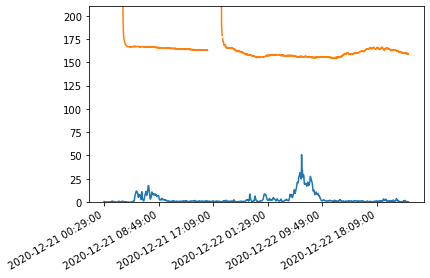

In [24]:
all_data['NO'].plot()
all_data['pm2.5_13.0'].plot()
plt.ylim(0,210)
plt.gcf().autofmt_xdate()